In [215]:
library(stats)
library(dplyr)

In [216]:
St_raw_reads = read.csv('C:/Users/sudha.gcupadhaya/Desktop/RNA-seq/RNA seq/DATA/R_FILES/Reads/Solanum_reads.csv')
St_degs = read.csv('C:/Users/sudha.gcupadhaya/Desktop/RNA-seq/RNA seq/DATA/R_FILES/Reads/Solanum_DEGs.csv')

In [217]:
length(unique(St_degs$Gene_ID))

[1] 2214

In [218]:
degs_read = St_raw_reads[St_raw_reads$geneID %in% St_degs$Gene_ID,]#subset degs

In [219]:
dim(degs_read)

[1] 2214   10

In [220]:
df <- data.frame(degs_read[,-1], row.names = degs_read[,1])

In [221]:
group = rep(c('653', '111', 'control'),each = 3)

In [222]:
names(df) = group#rename column

In [223]:
name_list = unique(group)

In [224]:
dim(df)

[1] 2214    9

In [225]:
avg_reads = sapply(name_list, function(x) rowMeans(df[names(df) %in% x]))

In [226]:
dim(avg_reads)

[1] 2214    3

In [227]:
log_counts = log2(avg_reads +1)
head(log_counts)

,653,111,control
PGSC0003DMG400000217,5.073249,3.058894,5.183222
Novel03424,8.635416,8.257388,10.123259
PGSC0003DMG400026354,6.961932,7.750428,7.774787
PGSC0003DMG400010498,3.700440,3.807355,5.882643
PGSC0003DMG400043373,12.061146,11.878562,11.878562
PGSC0003DMG400001283,4.890771,5.333901,6.363405


In [228]:
z_scaled = scale(log_counts)
head(z_scaled)

,653,111,control
PGSC0003DMG400000217,-1.7122539,-2.5202776,-1.6755579
Novel03424,-0.2308138,-0.3795776,0.6168411
PGSC0003DMG400026354,-0.9267852,-0.5883398,-0.4729553
PGSC0003DMG400010498,-2.2831802,-2.2120670,-1.3509951
PGSC0003DMG400043373,1.1938849,1.1115940,1.4313803
PGSC0003DMG400001283,-1.7881432,-1.5834471,-1.1279001


In [230]:
results = kmeans(z_scaled, centers =6, iter.max = 100, algorithm = 'Lloyd', )

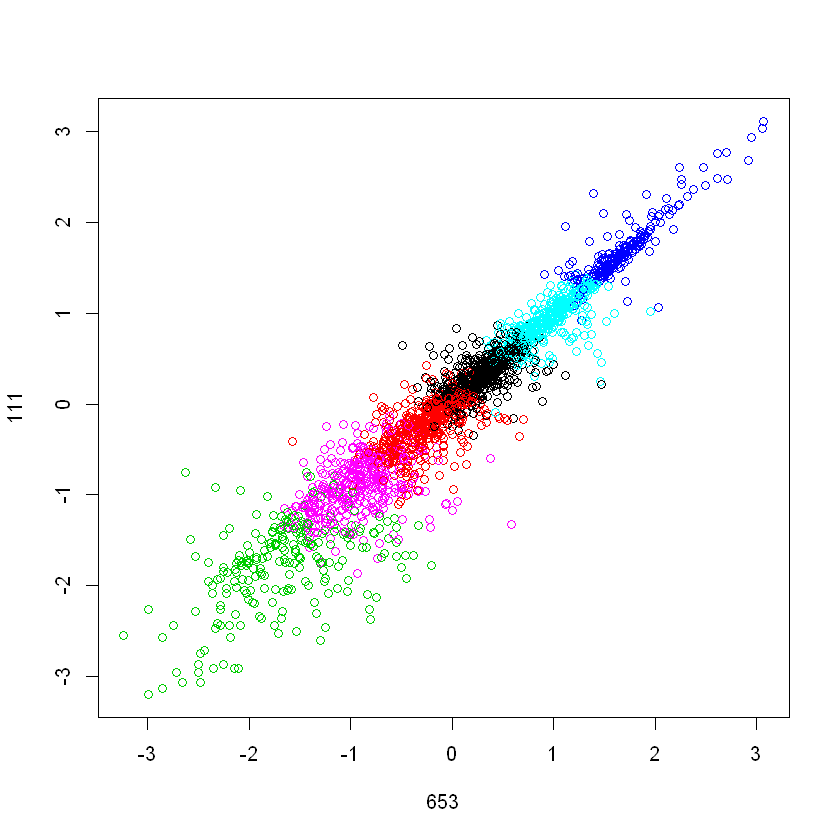

In [231]:
plot(z_scaled, col = results$cluster)

In [232]:
df_cl = data.frame(results$cluster)
df_cl$Gene_ID = rownames(df_cl)
rownames(df_cl)= NULL

In [233]:
names(df_cl) = c('cluster_no', 'Gene_ID')

In [234]:
cluster_1 = df_cl[df_cl$cluster_no == 3,]
cluster_1 = cluster_1$Gene_ID

In [235]:
write.csv(cluster_1, 'St_cls_3.csv')

In [236]:
results

K-means clustering with 6 clusters of sizes 521, 472, 232, 203, 398, 388

Cluster means:
         653        111    control
1  0.2949100  0.3175409  0.2942505
2 -0.2818100 -0.2619058 -0.2358756
3 -1.6426739 -1.7515111 -1.6894693
4  1.6853337  1.6970065  1.6305848
5  0.9455864  0.9151939  0.9083208
6 -0.9226793 -0.8871344 -0.8828215

Clustering vector:
PGSC0003DMG400000217           Novel03424 PGSC0003DMG400026354 
                   3                    2                    6 
PGSC0003DMG400010498 PGSC0003DMG400043373 PGSC0003DMG400001283 
                   3                    5                    3 
PGSC0003DMG400032289 PGSC0003DMG400030382 PGSC0003DMG400030092 
                   1                    6                    5 
PGSC0003DMG400021353           Novel01223 PGSC0003DMG400016154 
                   5                    5                    5 
PGSC0003DMG400004532 PGSC0003DMG400021701 PGSC0003DMG401012873 
                   2                    1                    2 
PGSC00